# Análise exploratória de dados, visualização e classificação

👋 Bem-vindo ao meu projeto de ciência de dados! Neste projeto, analisaremos um conjunto de dados com 100.000 mil registros listados no data frame "Diabetes prediction dataset" e criaremos um modelo de classificação para prever pacientes com diabetes. 🛍️💻

As informações contidas no data frame são:
* gênero;
* idade;
* histórico de tabagismo;
* IMC;
* HbA1c;
* Nível de glicose no sangue;
* E a própria classe Diabetes.


A princípio irei apenas fazer essa classificação binaria, mas pretendo melhorar o modelo para identificar os pacientes que possuem uma maior tendência para desenvolver a doença.


### *O projeto será dividido em:*



📊 Coleta de dados: coletaremos o conjunto de dados do Kaggle.


🕵️‍♂️ Análise exploratória de dados e visualização: analisaremos os dados para entender a importância das variáveis, identificar outliers, identificar tendências e padrões.
                           
                                 
🧹 Preparação de dados: vamos limpar e pré-processar o conjunto de dados para aplicar no algoritmo.


⚙️ Aplicar Naive Bayes: desenvolveremos um sistema de classificação usando algoritmo de aprendizado de máquina Naive Bayes para prever pacientes que possuem diabetes com base em registros históricos de outros pacientes.
                   
                   
🧠 Conclusão: realizaremos uma reflexão sobre a acurácia do modelo de classificação e possíveis aplicações que poderíamos dar para o modelo.


                   

Features:
* Gender: Sexo refere-se ao sexo biológico -------------- Categorica
* Age: Idade -------------------------------------------- Numérica
* Hypertension: Hipertensão ----------------------------- Categórica
* Heart Disease: doença cardíaca ------------------------ Categórica
* Smoking History: Histórico de tabagismo --------------- Categórica
* BMI(Body Mass Index): IMC (Índice de Massa Corporal) -- Numérica
* HbA1c Level: HbA1c (Hemoglobina A1c) ------------------ Numérica
* Blood Glucose Level: Nível de glicose no sangue ------- Numérica
* Diabetes: 0 é negativo, 1 é positivo ------------------ Categórica



Para acessar o conjunto de dados, basta acessar o site do Kaggle: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?datasetId=3102947&sortBy=dateRun&tab=collaboration



# Importando bibliotecas e a Base de Dados

In [1]:
#importando biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#importando base de dados e criando uma variavel extra
df_diabetes = pd.read_csv('/content/diabetes_prediction_dataset.csv', decimal='.')
df_var = df_diabetes

# Análise exploratória e visualização


In [3]:
#Exibindo as 10 primeiras linhas
df_diabetes.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
#verificando detalhes sobre o df
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
#Visualizando os valores mínimos, máximos, desvio, média, 1º quartil, 2º quartil e 3º quartil
df_diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
#verificando se tem colunas NAN no df,
df_var.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

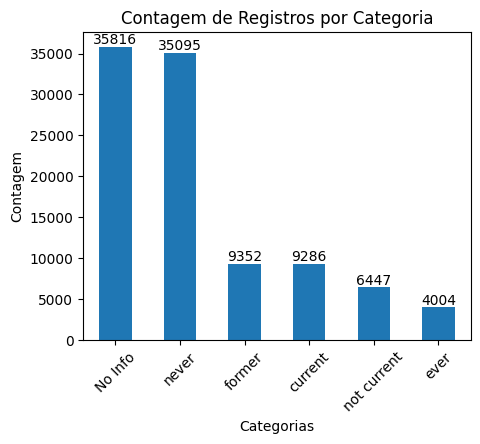

In [7]:
#Apenas contando os valores possiveis que cada registro pode assumir na coluna

#contagem
contagem = df_var['smoking_history'].value_counts()

plt.figure(figsize=(5, 4))
# Plotagem do gráfico de barras
contagem.plot(kind='bar')

# Adiciona rótulos e título
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.title('Contagem de Registros por Categoria')

# Ajusta o alinhamento dos rótulos do eixo x em 45º
plt.xticks(rotation=45)

#contando e colocando o valor no topo de cada barra
for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibe o gráfico
plt.show()

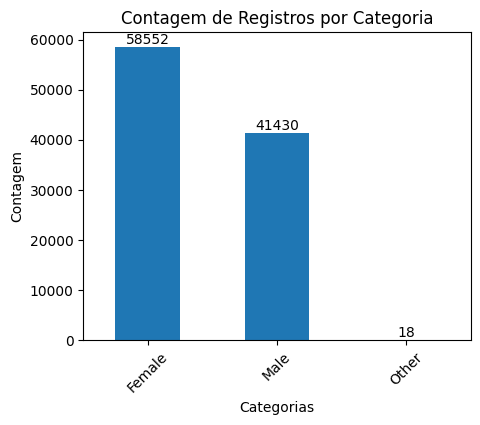

In [8]:
#contagem
contagem = df_var['gender'].value_counts()

plt.figure(figsize=(5, 4))
# Plotagem do gráfico de barras
contagem.plot(kind='bar')

# Adiciona rótulos e título
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.title('Contagem de Registros por Categoria')

# Ajusta o alinhamento dos rótulos do eixo x em 45º
plt.xticks(rotation=45)

#contando e colocando o valor no topo de cada barra
for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibe o gráfico
plt.show()

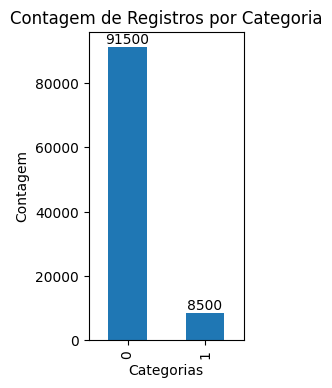

In [9]:
#O df esta muito desbalanceado
contagem = df_var['diabetes'].value_counts()

plt.figure(figsize=(2, 4))
# Plotagem do gráfico de barras
contagem.plot(kind='bar')

# Adiciona rótulos e título
plt.xlabel('Categorias')
plt.ylabel('Contagem')
plt.title('Contagem de Registros por Categoria')

#contando e colocando o valor no topo de cada barra
for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Exibe o gráfico
plt.show()

Com esse gráfico é possível observar que a base de dados está muito desbalanceada, isso pode gerar uma interpretação errada da acurácia do nosso modelo, sendo indicado fazer um balanceamento dos dados, tirando os registros da classe majoritária, ou colocando novos registros da classe minoritária. Vamos apricar depois a tecnica de remover os registro da classe, para tentar balancear os dados.

<ipython-input-10-f43069f9f6ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_var.corr()


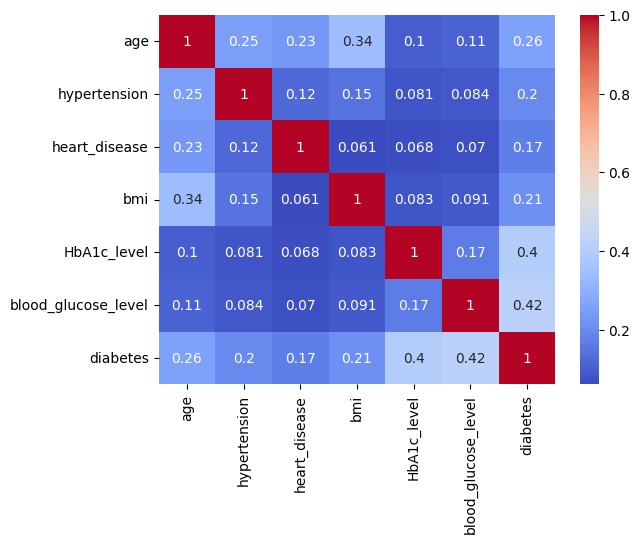

In [10]:
# Calcular matriz de correlação
correlation_matrix = df_var.corr()

# Visualizar a matriz de correlação em um mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

Com essa matriz de correlação é possível ver que só existem relações positivas entre as variaveis, sendo Blood_glucose_level e HbA1C_level  as variáveis com as relações mais fortes com a nossa classe.

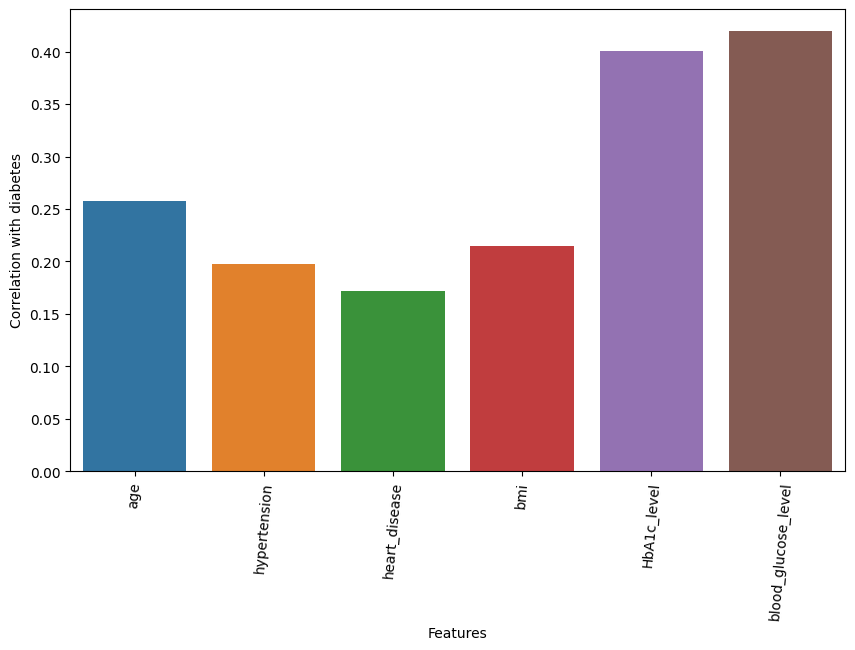

In [11]:
# Seleciona a coluna 'Diabetes' da matriz de correlação
diab_correlation = correlation_matrix['diabetes']

# Remove a correlação com a própria feature 'Diabetes'
diab_correlation = diab_correlation.drop('diabetes')

# Plota um gráfico de barras da correlação
plt.figure(figsize=(10, 6))  # Defina o tamanho da figura
sns.barplot(x=diab_correlation.index, y=diab_correlation.values)
plt.xticks(rotation=85)

plt.xlabel('Features')
plt.ylabel('Correlation with diabetes')

plt.show()

Esse outro gráfico apenas reforça as reçaões ja encontradas no gráfico anterior.

In [12]:
grafico1 = px.parallel_categories(df_var, dimensions=['blood_glucose_level','diabetes'])
grafico1.show()

A relação fica mais evidente, pois as pessoas com diabetes apresentaram uma blood_glucose_level mais elevada, enquanto as pessoas com valores mais baixos vai exatamente na contra mão



In [13]:
grafico2 = px.parallel_categories(df_var, dimensions=['HbA1c_level','diabetes'])
grafico2.show()

HbA1C_level mantem a mesma realação, os valores de 6,8 até 9 apenas mantem uam ralação de 100% com pessoas com diabetes

In [14]:
grafico33 = px.parallel_categories(df_var, dimensions=['gender','diabetes'])
grafico33.show()

 Aproximadamente 7,61% de homens e 9,74 % de mulheres com diabetes na base de dados


Apesar de o género ser ainda um fator pouco estudado no que toca à prevenção e tratamento da diabetes, são cada vez mais os investigadores que questionam a sua importância, tendo isso em vista, o fator Gênero será desconsiderado desse modelo.


In [15]:
#visualisando a distribuição da das pessoas com diabetes dentro das subpartes da variavel smoking_history
grafico3  = px.treemap(df_var, path=['smoking_history','diabetes'])
grafico3.show()

In [16]:

grafico3  = px.treemap(df_var, path=['heart_disease','diabetes'])
grafico3.show()

A coluna de Problema cardíaco (heart_disease) também será analisada, para verificar a real importância dela para o modelo, já que não discrimina muito bem que tipo de problema cardíaco o paciente tem, mas n vou retirar ela nos primeiros testes

# Preparação dos dados

In [17]:
data = df_diabetes[['age', 'hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   smoking_history      100000 non-null  object 
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.1+ MB


In [18]:
#selecionando apenas colunas features e transformando em um aquivo numpy.ndarray
X_data = data.iloc[:,0:7].values
X_data

array([[80.0, 0, 1, ..., 25.19, 6.6, 140],
       [54.0, 0, 0, ..., 27.32, 6.6, 80],
       [28.0, 0, 0, ..., 27.32, 5.7, 158],
       ...,
       [66.0, 0, 0, ..., 27.83, 5.7, 155],
       [24.0, 0, 0, ..., 35.42, 4.0, 100],
       [57.0, 0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [19]:
#passando todas as linhas e apenas a coluna diabetes para a variavvel y_data e transformando em numpy.ndarray
y_data = data.iloc[:,7].values
y_data

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
#LABELENCODER
#mudar colunas para formato numerico
from sklearn.preprocessing import LabelEncoder

label_encoder_smoking_history = LabelEncoder()
X_data[:,3] = label_encoder_smoking_history.fit_transform(X_data[:,3])

In [21]:
#dividindo o em teste e treinamento
from sklearn.model_selection import train_test_split

X_customers_treinamento, X_customers_teste, y_customers_treinamento, y_customers_teste = train_test_split(X_data, y_data, test_size = 0.20, random_state=0)

In [22]:
#verificando o tamanho
X_customers_treinamento.shape, X_customers_teste.shape, y_customers_treinamento.shape, y_customers_teste.shape

((80000, 7), (20000, 7), (80000,), (20000,))

Apenas apliquei o LABEL ENCODER, mas pretendo aplicar outras tecnicas de engenharia de variavel, como o one hot encoding para melhorar o desempenho final

Também irei dividir o df em mais uma parte de validação.


# Aplicação do naive *bayes*

Agora que está separado em treino e teste, posso aplicar o algoritimo de classificação Naive Bayes, que calcula e aprende com base em uma tabela de probabilidade para conseguir prever casos futuros.

In [23]:
#importando o algoritimo
from sklearn.naive_bayes import GaussianNB

naive_customers = GaussianNB()

#treinando o algoritimo
naive_customers.fit(X_customers_treinamento,y_customers_treinamento)


previsoes_nv = naive_customers.predict(X_customers_teste)

In [24]:


from sklearn.metrics import accuracy_score, confusion_matrix

#calculando o aproveitamento das previsões
accuracy_score(y_customers_teste, previsoes_nv)

0.9028

* 90,28 % de aproveitamento, todavia é um aproveitamento menor se classificasse todos como 0 (sem diabetes ), com o auxílio da matriz de confusão vou analisar se as previsões de quem tem diabetes teve um bom aproveitamento

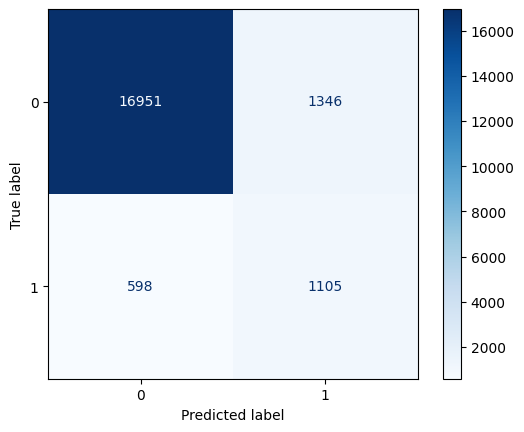

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#matrix de confusão
cm = confusion_matrix(y_customers_teste, previsoes_nv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

Analisando a matriz de confusão:

 * 16.951 mil registro foram classificados como pacientes sem diabetes e realmente eles não possuem;

 * 1.346 mil pacientes foram classificados como tendo diabetes sendo que eles não possuem;

 * 598 pacientes foram classificados com diabetes, mas não possue e

 * 1.105 paciente fora classificados com diabetes e realmente possuem diabetes

Na identificação de clientes com diabetes, que é o nosso foco o algoritimo teve um aproveitamento de 64,88%,  pois de 1.703 clientes com diabetes classificou 1.105 corretamente, porem classificou 598 pacientes que possuem como se não tivessem diabetes.


* Isso me deixa margem para criar uma nova classe, para identificar clientes que não possuem diabetes ainda, mas que possuem uma pré-disposição para desenvolver, porém eu teria que fazer uma nova análise exploratória em cima desses registro.


# Aplicando transformações

Depois de conseguir um resultado com o algoritmo, irei verificar se aplicando algumas técnicas na transformações de variáveis irei conseguir melhorar o aproveitamento, técnicas essas que já comentei como o balanceamento e o one hot encoding.

In [35]:
#fazendo uma copia do nosso data frame original, selecionando apenas as colunas de interesse, no caso apenas retirei os problemas cardiacos, que demonstrou a realação mais fraca com a classe
df_new = df_var[['age','hypertension','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes']]
df_new

,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,never,25.19,6.6,140,0
1,54.0,0,No Info,27.32,6.6,80,0
2,28.0,0,never,27.32,5.7,158,0
3,36.0,0,current,23.45,5.0,155,0
4,76.0,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,No Info,27.32,6.2,90,0
99996,2.0,0,No Info,17.37,6.5,100,0
99997,66.0,0,former,27.83,5.7,155,0
99998,24.0,0,never,35.42,4.0,100,0


In [69]:
df_new_X = df_new.iloc[:,0:6].values

In [68]:
df_new_y = df_new.iloc[:,6].values

In [86]:
label_encodere_age = LabelEncoder()
label_encodere_smoking_history = LabelEncoder()
label_encodere_bmi = LabelEncoder()
label_encodere_HbA1c_level = LabelEncoder()
label_encodere_blood_glucose_level = LabelEncoder()
label_encodere_diabetes = LabelEncoder()

df_new_X[:,0] = label_encodere_age.fit_transform(df_new_X[:,0])
df_new_X[:,1] = label_encodere_smoking_history.fit_transform(df_new_X[:,1])
df_new_X[:,2] = label_encodere_bmi.fit_transform(df_new_X[:,2])
df_new_X[:,3] = label_encodere_HbA1c_level.fit_transform(df_new_X[:,3])
df_new_X[:,4] = label_encodere_blood_glucose_level.fit_transform(df_new_X[:,4])
df_new_y[:] = label_encodere_diabetes.fit_transform(df_new_y[:])

In [87]:
#oneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#criando uma variavel para selecionar as colunas onde quero aplicar oneHotEncoder
onehotencoder_customers = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2])], remainder='passthrough')

In [89]:
#aplicando OneHotEncoder nas colunas
df_new_X = onehotencoder_customers.fit_transform(df_new_X)

In [91]:
#agora tem mais colunas, por causa do one hot
df_new_X.shape

(100000, 12)

Vamos começar balanceando os dados com randomundersampler

In [92]:
#importando biblioteca
from imblearn.under_sampling import RandomUnderSampler

In [93]:
rus = RandomUnderSampler(random_state=42)

In [94]:
X_res, y_res = rus.fit_resample(df_new_X, df_new_y)

In [95]:
X_res.shape

(17000, 12)

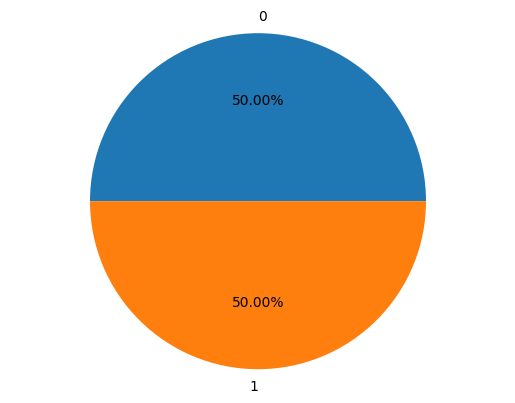

In [96]:
# Calcular a contagem de valores únicos no array
unique_values, counts = np.unique(y_res, return_counts=True)

# Plotar o gráfico de pizza
plt.pie(counts, labels=unique_values, autopct='%.2f%%')
plt.axis('equal')  # Garantir que o gráfico seja exibido como um círculo
plt.show()

In [102]:

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_res, y_res, test_size = 0.15, random_state=0)

In [103]:
#importando o algoritimo

naive_customers = GaussianNB()

#treinando o algoritimo
naive_customers.fit(X_treinamento,y_treinamento)

previsoes_new = naive_customers.predict(X_teste)

#calculando o aproveitamento das previsões
accuracy_score(y_teste, previsoes_new)

0.8286274509803921

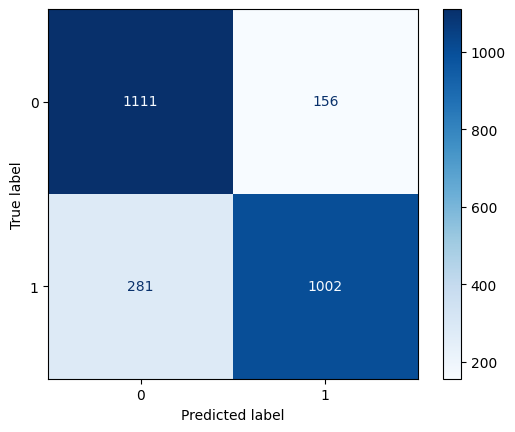

In [104]:

#matrix de confusão
cm = confusion_matrix(y_teste, previsoes_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Conclusão

Esse modelo pode ser útil para os profissionais na área da saúde para identificação de pacientes com e que podem estar em risco de desenvolver diabetes,  desenvolvendo diferentes planos de tratamento personalizados. Além disso, o conjunto de dados pode ser usado por pesquisadores para explorar as relações entre vários fatores médicos e demográficos e a probabilidade de desenvolver diabetes.